In [1]:
library(data.table)
library(reshape2)
library(plyr)
library(ggplot2)
library(dplyr)
library(stringr)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
output_dir <- "round1_plots"
if (!dir.exists(output_dir)) {
    dir.create(output_dir)
  }

dir <- "round1"

In [ ]:
counts_horizontal <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_ebd5d08c92e59058d17818c89d633bc4.tmp", sep="/")
str_typeCount <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_befdd0a3f211c9c7a606cb786c2ef863.tmp", sep="/")
nonRep_typeCount <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_f545feba9f416c5a8b503021d0ccf29e.tmp", sep="/")
nonRep_lengths <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_b02c8c823386764afc19702f118d72b0.tmp", sep="/")
sv_str_VennInput <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_8fd3b25c2db5902381597cca500ae5c7.tmp", sep="/")
str_lengths <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_8c91babb438271a4a5ed61658f765e07.tmp", sep="/")
happy_extended <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_51d18ba14618c9201abe7dd4c349537f.tmp", sep="/")
genomecov_noGaps <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_30955bb5b8b013be558f1085616415b0.tmp", sep="/")
segDup_typeCount <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_afac60d03a7738fd00046629cb726fdf.tmp", sep="/")
indel_lengths_horizontal <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_3ac88ce248d9a14dcb45ec84e0b76397.tmp", sep="/")
happy_het_counts_horizontal <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_ce8f7658892f3bf96781581c6b143878.tmp", sep="/")
segDup_lengths <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_7e4f72479bf2a79fb395e8c3acb2f461.tmp", sep="/")
sv_segDup_VennInput <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_c42dc6aeb8c1cd59cac11f6b46f19019.tmp", sep="/")
indel_counts <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_9c59639608aa522cd2dad0c069615972.tmp", sep="/")
sv_counts_horizontal <- paste(dir, "/cromwell-executions/PlotAssemblies/a0ca5fcf-0de9-45d6-a869-d9dfe02aab42/call-make_plots/inputs/781347057/write_lines_b59c4353065cb5e37e21711f924e0469.tmp", sep="/")

In [ ]:
populations <- read.table(file=pop, header=FALSE, sep="\t", col.names=c("Sample", "Population", "Superpopulation", "Sex"))
small_variants_files <- read.table(file=happy_extended, header=FALSE, col.names=c("file"))
indels_files <- read.table(file=indel_counts, header=FALSE, col.names=c("file"))
sv_files <- read.table(file=sv_counts_horizontal, header=FALSE, col.names=c("file"))
genome_cov_files <- read.table(file=genomecov_noGaps, header=FALSE, col.names=c("file"))
nonRep_lengths_files <- read.table(file=nonRep_lengths, header=FALSE, col.names=c("file"))
str_lengths_files <- read.table(file=str_lengths, header=FALSE, col.names=c("file"))
segDup_lengths_files <- read.table(file=segDup_lengths, header=FALSE, col.names=c("file"))
counts_files <- read.table(file=counts_horizontal, header=FALSE, col.names=c("file"))
nonRep_types_files <- read.table(file=nonRep_typeCount, header=FALSE, col.names=c("file"))
str_types_files <- read.table(file=str_typeCount, header=FALSE, col.names=c("file"))
segDup_types_files <- read.table(file=segDup_typeCount, header=FALSE, col.names=c("file"))
het_fates_files <- read.table(file=happy_het_counts_horizontal, header=FALSE, col.names=c("file"))
str_venn_files <- read.table(file=sv_str_VennInput, header=FALSE, col.names=c("file"))
segDup_venn_files <- read.table(file=sv_segDup_VennInput, header=FALSE, col.names=c("file"))
cigar_indel_lengths_file <- read.table(file=indel_lengths_horizontal, header=FALSE, col.names=c("file"))
assembly_file <- read.table(file=assembly_tsv, header=FALSE, col.names=c("Name", "Fasta1", "Fasta2", "Truth", "ID", "DataType"), sep="\t")
assemblies <- assembly_file[,c("Name", "ID", "DataType")]
assemblies$Squashed <- rep(FALSE, length(assemblies$Name))
assemblies$Squashed[grepl("empty.fa", assembly_file$Fasta2)] <- TRUE
assemblies$ID <- as.character(assemblies$ID)
assemblies$ID[assemblies$Squashed] <- paste(assemblies$ID[assemblies$Squashed], "*", sep="")
assemblies$ID <- factor(assemblies$ID, levels=str_sort(unique(assemblies$ID), numeric=TRUE))

tsv_final <- assemblies[,c("Name", "ID", "DataType")]

Saving 6.67 x 6.67 in image



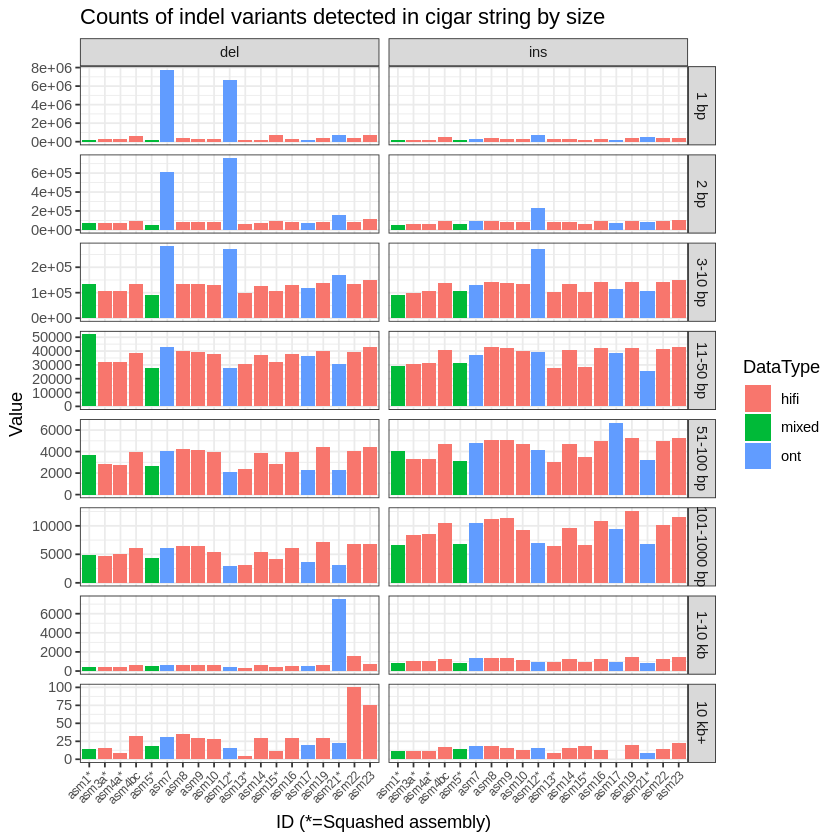

In [3]:
cigar_indel_lengths <- data.frame()
for (in_file in cigar_indel_lengths_file$file) {
    assembly <- gsub(".indel_lengths.horizontal.txt", "", basename(in_file))
    df <- read.table(file=in_file, header=TRUE, sep="\t")
    df$Assembly <- assembly
    cigar_indel_lengths <- rbind(cigar_indel_lengths, df)
}
cigar_indel_lengths$Metric = factor(cigar_indel_lengths$Metric, levels=c("1 bp", "2 bp", "3-10 bp", "11-50 bp", "51-100 bp", "101-1000 bp", "1-10 kb", "10 kb+"))

cigar_indel_lengths <- merge(cigar_indel_lengths, assemblies, by.x="Assembly", by.y="Name")
ggplot(cigar_indel_lengths, aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric~Type, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Counts of indel variants detected in cigar string by size")
ggsave(paste(output_dir, "indel_cigar_counts.png", sep="/"))

short_deletions <- cigar_indel_lengths %>%
    filter(Type=="del") %>% filter(Metric == "1 bp" | Metric == "2 bp" | Metric == "3-10 bp" | Metric == "11-50 bp") %>%
    group_by(ID) %>% summarize(sum=sum(Value))
tsv_final <- merge(tsv_final, short_deletions %>%
                   select(ID, sum) %>%
                   rename(deletions=sum), by="ID")
short_insertions <- cigar_indel_lengths %>%
    filter(Type=="ins") %>% filter(Metric == "1 bp" | Metric == "2 bp" | Metric == "3-10 bp" | Metric == "11-50 bp") %>%
    group_by(ID) %>% summarize(sum=sum(Value))
tsv_final <- merge(tsv_final, short_insertions %>%
                   select(ID, sum) %>%
                   rename(insertions=sum), by="ID")

Saving 6.67 x 6.67 in image



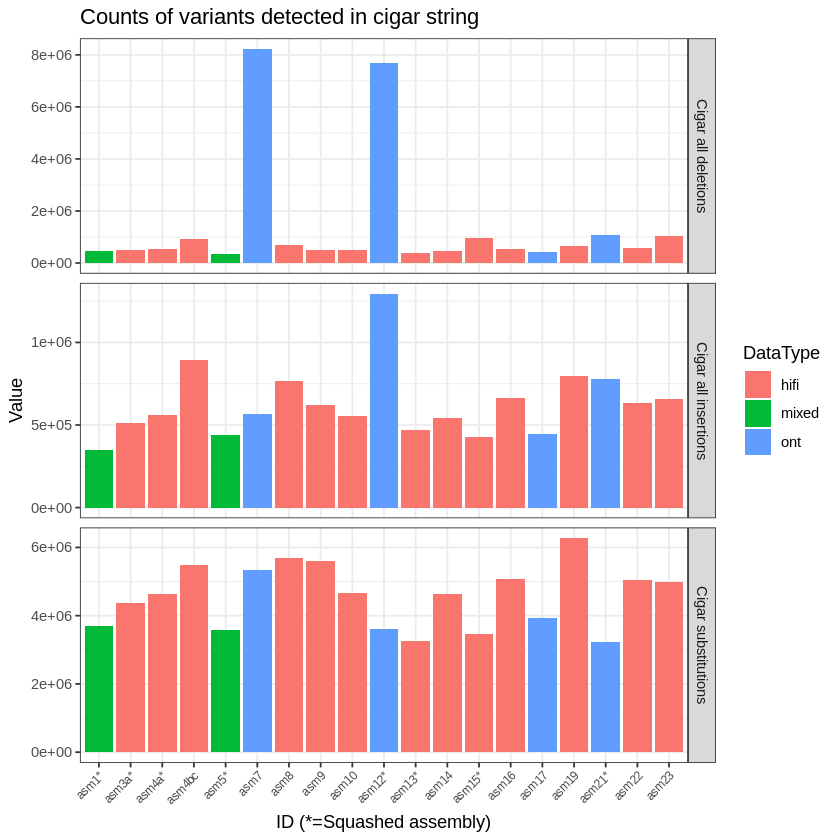

Saving 6.67 x 6.67 in image



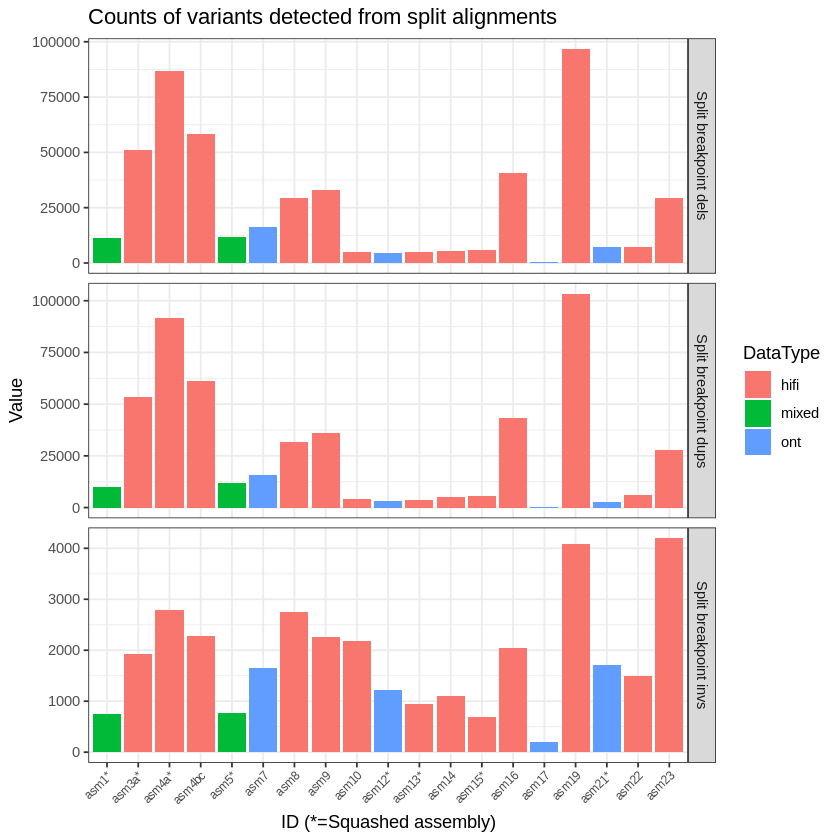

Saving 6.67 x 6.67 in image



,ID,Name,DataType,deletions,insertions,snv_count,sv_count,sv_nonrep_count,sv_str_count,sv_segdup_count
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,asm1*,HG002.Ash1v1.7,mixed,450157,325156,3691638,60184,11526,45487,3171
2,asm10,HG002.DFCI-dipasm,hifi,534633,550707,4652716,55797,9608,40714,5475
3,asm12*,HG002.Clemson,ont,7687116,1286138,3618113,42295,7831,28783,5681
4,asm13*,HG002.JR_wtdbg2,hifi,375437,456377,3254991,36412,5471,28000,2941
5,asm14,HG002.Marschall_Eichler,hifi,473836,532835,4648240,51764,7840,40979,2945
6,asm15*,HG002.JHU,hifi,962996,405282,3469224,40796,5278,32229,3289


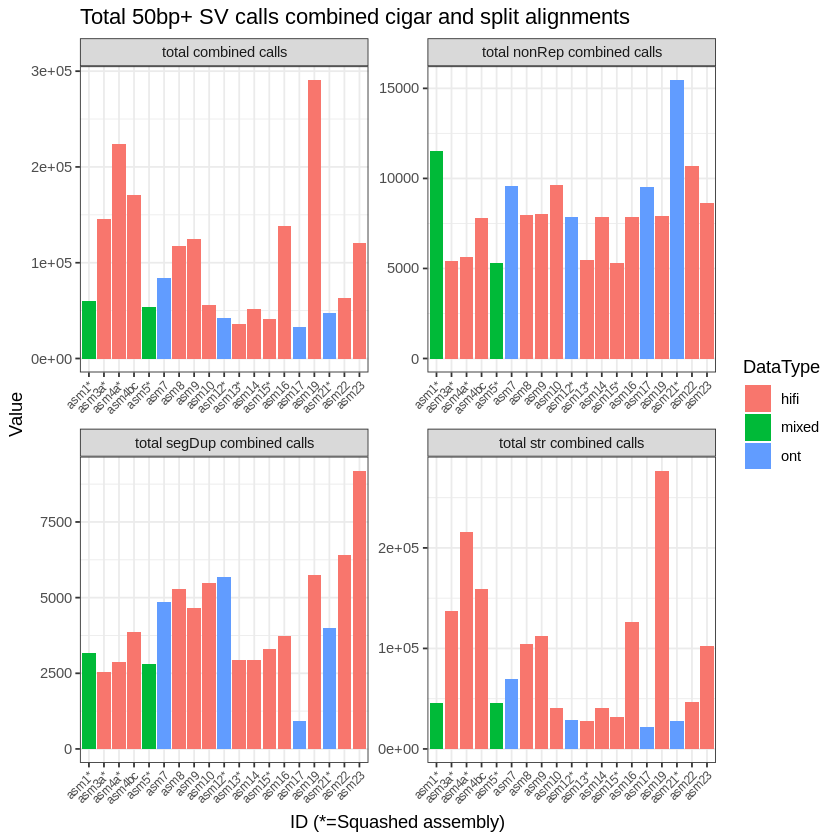

In [4]:
counts <- data.frame()
for (in_file in counts_files$file) {
    assembly <- gsub(".counts.horizontal.txt", "", basename(in_file))
    df <- read.table(file=in_file, header=FALSE, sep="\t", col.names=c("Metric", "Value"))
    df$Assembly <- assembly
    counts <- rbind(counts, df)
}

counts <- merge(counts, assemblies, by.x="Assembly", by.y="Name")
ggplot(counts %>% filter(str_detect(Metric, "^Cigar")) %>% filter(!str_detect(Metric, "bp")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric~., scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Counts of variants detected in cigar string")
ggsave(paste(output_dir, "cigar_counts.png", sep="/"))

ggplot(counts %>% filter(str_detect(Metric, "^Split")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric~., scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Counts of variants detected from split alignments")
ggsave(paste(output_dir, "split_counts.png", sep="/"))

ggplot(counts %>% filter(str_detect(Metric, "^total")) %>% filter(!str_detect(Metric, "our")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_wrap("Metric", scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Total 50bp+ SV calls combined cigar and split alignments")
ggsave(paste(output_dir, "total_sv_counts.png", sep="/"))

tsv_final <- merge(tsv_final, counts %>% filter(Metric=="Cigar substitutions") %>%
                   select(ID, Value) %>%
                   rename(snv_count=Value), by="ID")
tsv_final <- merge(tsv_final, counts %>% filter(Metric=="total combined calls") %>%
                   select(ID, Value) %>%
                   rename(sv_count=Value), by="ID")
tsv_final <- merge(tsv_final, counts %>% filter(Metric=="total nonRep combined calls") %>%
                   select(ID, Value) %>%
                   rename(sv_nonrep_count=Value), by="ID")
tsv_final <- merge(tsv_final, counts %>% filter(Metric=="total str combined calls") %>%
                   select(ID, Value) %>%
                   rename(sv_str_count=Value), by="ID")
tsv_final <- merge(tsv_final, counts %>% filter(Metric=="total segDup combined calls") %>%
                   select(ID, Value) %>%
                   rename(sv_segdup_count=Value), by="ID")
head(tsv_final)

Saving 6.67 x 6.67 in image



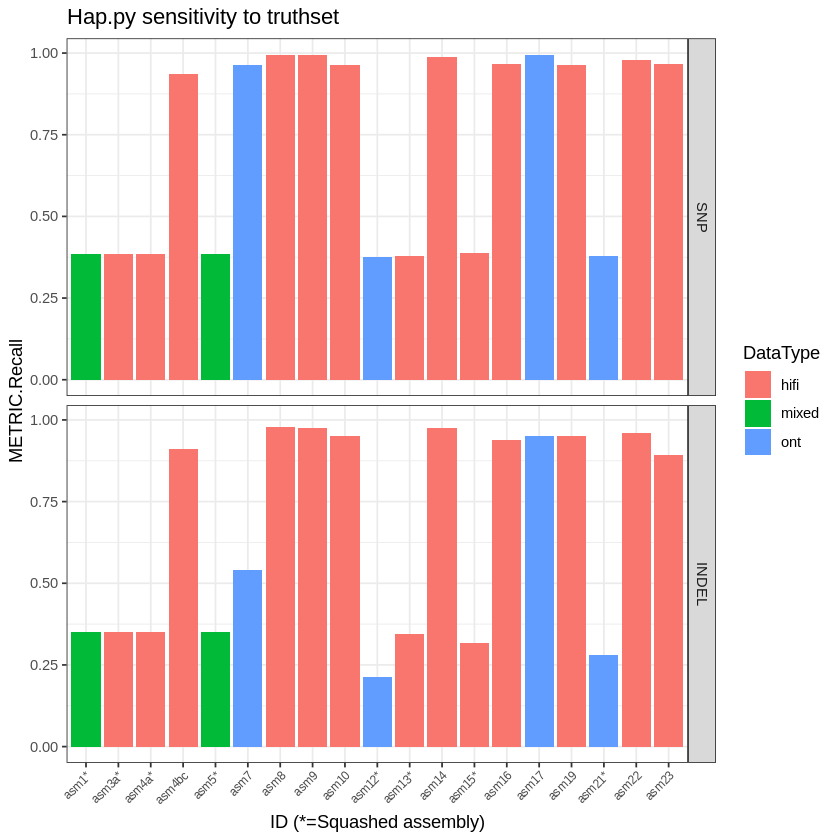

Saving 6.67 x 6.67 in image



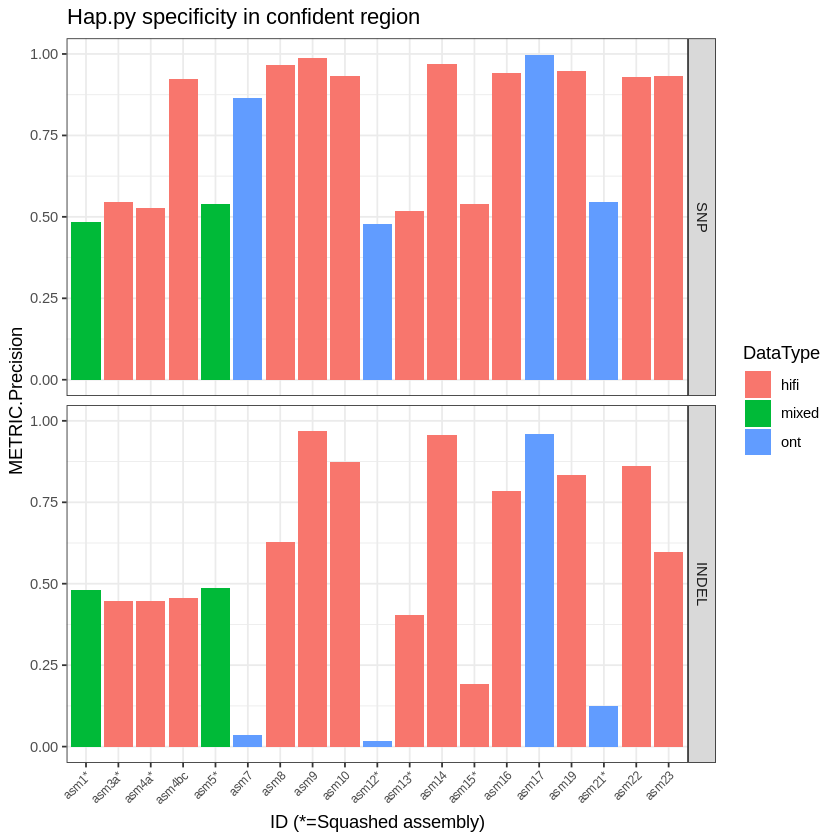

Saving 6.67 x 6.67 in image



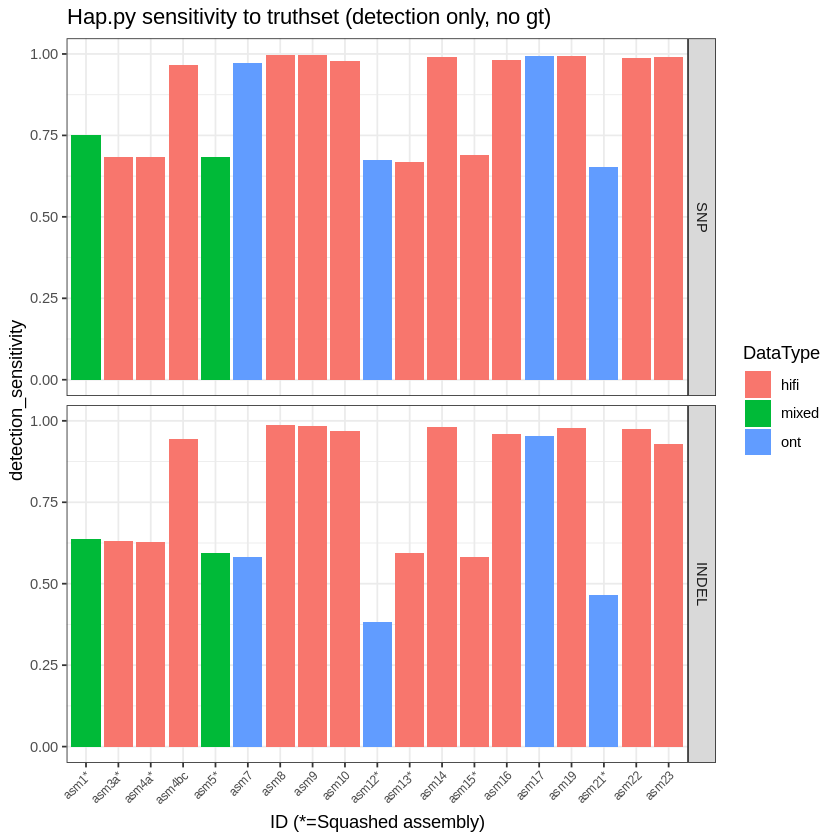

Saving 6.67 x 6.67 in image



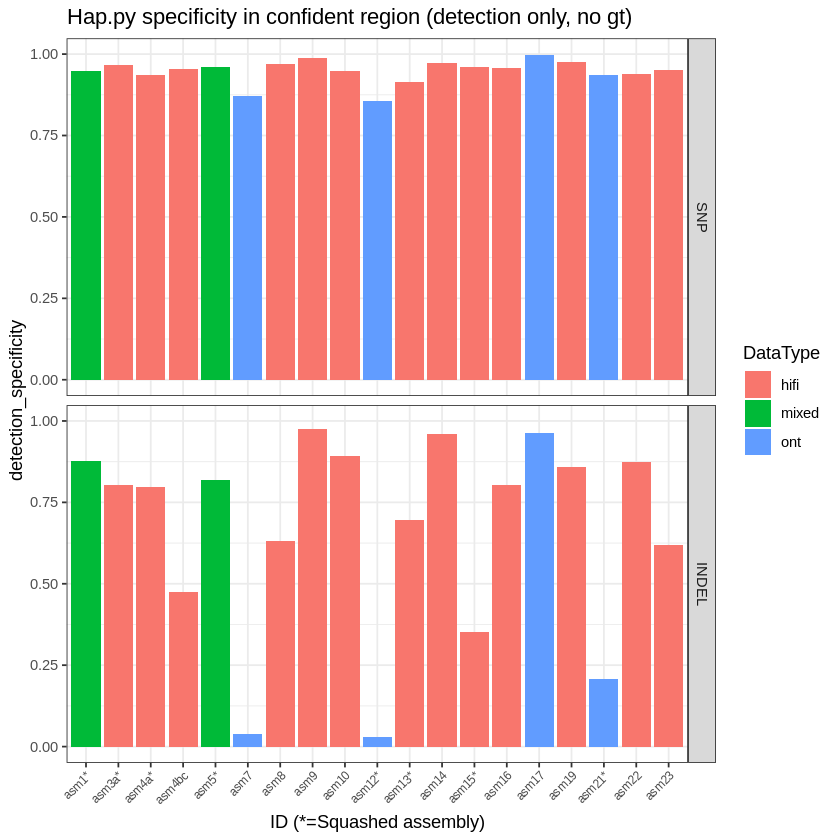

Saving 6.67 x 6.67 in image



,ID,Name,DataType,deletions,insertions,snv_count,sv_count,sv_nonrep_count,sv_str_count,sv_segdup_count,snv_detection_sensitivity,snv_detection_specificity,indel_detection_sensitivity,indel_detection_specificity
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,asm1*,HG002.Ash1v1.7,mixed,450157,325156,3691638,60184,11526,45487,3171,0.7526724,0.7322627,0.6376111,0.46541793
2,asm10,HG002.DFCI-dipasm,hifi,534633,550707,4652716,55797,9608,40714,5475,0.9793123,0.7439870,0.9685168,0.47238137
3,asm12*,HG002.Clemson,ont,7687116,1286138,3618113,42295,7831,28783,5681,0.6749516,0.6786710,0.3828038,0.02536512
4,asm13*,HG002.JR_wtdbg2,hifi,375437,456377,3254991,36412,5471,28000,2941,0.6668779,0.7439312,0.5954259,0.40706801
5,asm14,HG002.Marschall_Eichler,hifi,473836,532835,4648240,51764,7840,40979,2945,0.9916644,0.7531881,0.9813611,0.50909666
6,asm15*,HG002.JHU,hifi,962996,405282,3469224,40796,5278,32229,3289,0.6903730,0.7128835,0.5806525,0.24166920


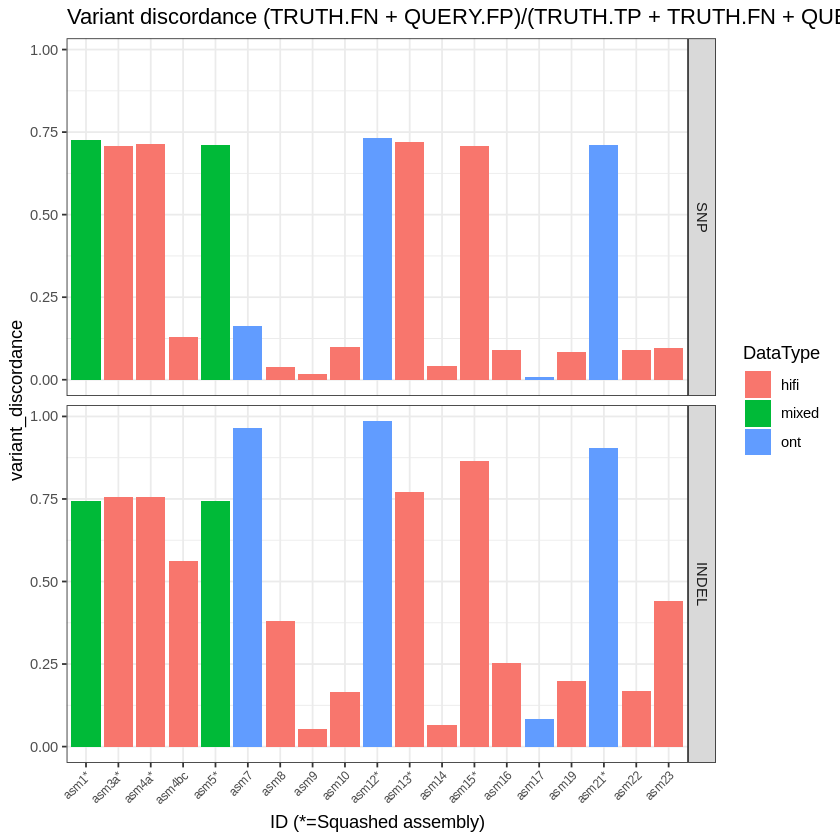

In [5]:
small_variants <- data.frame()
for (in_file in small_variants_files$file) {
    assembly <- gsub(".happy.extended.csv", "", basename(in_file))
    df <- read.table(file=in_file, header=TRUE, sep=",")
    df$Assembly <- assembly
    small_variants <- rbind(small_variants, df)
}
small_variants$Subset <- recode(small_variants$Subset, "*"="ALL")
small_variants$Type <- factor(small_variants$Type, levels=c("SNP", "INDEL"))
small_variants <- merge(small_variants, assemblies, by.x="Assembly", by.y="Name")
small_variants$variant_discordance <- (small_variants$TRUTH.FN + small_variants$QUERY.FP)/(small_variants$TRUTH.TP + small_variants$TRUTH.FN + small_variants$QUERY.FP)
small_variants$detection_sensitivity <- (small_variants$TRUTH.TP + small_variants$FP.gt)/small_variants$TRUTH.TOTAL
small_variants$detection_specificity <- (small_variants$QUERY.TP + small_variants$FP.gt)/small_variants$QUERY.TOTAL

ggplot(small_variants %>% filter(Subset == "ALL" & Subtype=="*") %>% filter(Filter == "PASS" | Filter=="*"), aes(x=ID, y=METRIC.Recall, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Type~.) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Hap.py sensitivity to truthset")
ggsave(paste(output_dir, "happy.sensitivity.png", sep="/"))

ggplot(small_variants %>% filter(Subset == "TS_contained" & Subtype=="*") %>% filter(Filter == "PASS" | Filter=="*"), aes(x=ID, y=METRIC.Precision, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Type~.) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Hap.py specificity in confident region")
ggsave(paste(output_dir, "happy.specificity.png", sep="/"))

ggplot(small_variants %>% filter(Subset == "ALL" & Subtype=="*") %>% filter(Filter == "PASS" | Filter=="*"), aes(x=ID, y=detection_sensitivity, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Type~.) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Hap.py sensitivity to truthset (detection only, no gt)")
ggsave(paste(output_dir, "happy.sensitivity_detection.png", sep="/"))

ggplot(small_variants %>% filter(Subset == "TS_contained" & Subtype=="*") %>% filter(Filter == "PASS" | Filter=="*"), aes(x=ID, y=detection_specificity, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Type~.) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Hap.py specificity in confident region (detection only, no gt)")
ggsave(paste(output_dir, "happy.specificity_detection.png", sep="/"))

ggplot(small_variants %>% filter(Subset == "TS_contained" & Subtype=="*") %>% filter(Filter == "PASS" | Filter=="*"), aes(x=ID, y=variant_discordance, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Type~.) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Variant discordance (TRUTH.FN + QUERY.FP)/(TRUTH.TP + TRUTH.FN + QUERY.FP)")
ggsave(paste(output_dir, "happy.variant_discordance.png", sep="/"))

tsv_final <- merge(tsv_final, small_variants[,c("ID", "detection_sensitivity", "detection_specificity", "Subset", "Subtype", "Filter", "Type")] %>% 
                   filter(Subset == "ALL" & Subtype=="*") %>% 
                   filter(Filter == "PASS" | Filter=="*") %>%
                   filter(Type == "SNP") %>%
                   select(ID, detection_sensitivity, detection_specificity) %>%
                   rename(snv_detection_sensitivity = detection_sensitivity) %>%
                   rename(snv_detection_specificity = detection_specificity), by="ID")
                   
tsv_final <- merge(tsv_final, small_variants[,c("ID", "detection_sensitivity", "detection_specificity", "Subset", "Subtype", "Filter", "Type")] %>% 
                   filter(Subset == "ALL" & Subtype=="*") %>% 
                   filter(Filter == "PASS" | Filter=="*") %>%
                   filter(Type == "INDEL") %>%
                   select(ID, detection_sensitivity, detection_specificity) %>%
                   rename(indel_detection_sensitivity = detection_sensitivity) %>%
                   rename(indel_detection_specificity = detection_specificity), by="ID")
head(tsv_final)

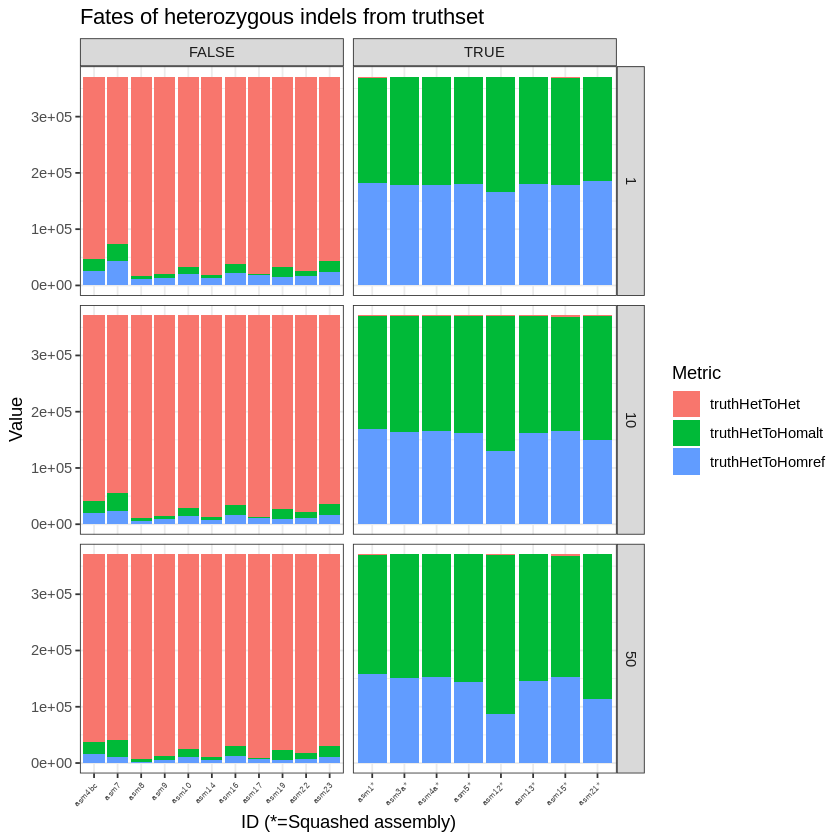

Saving 6.67 x 6.67 in image



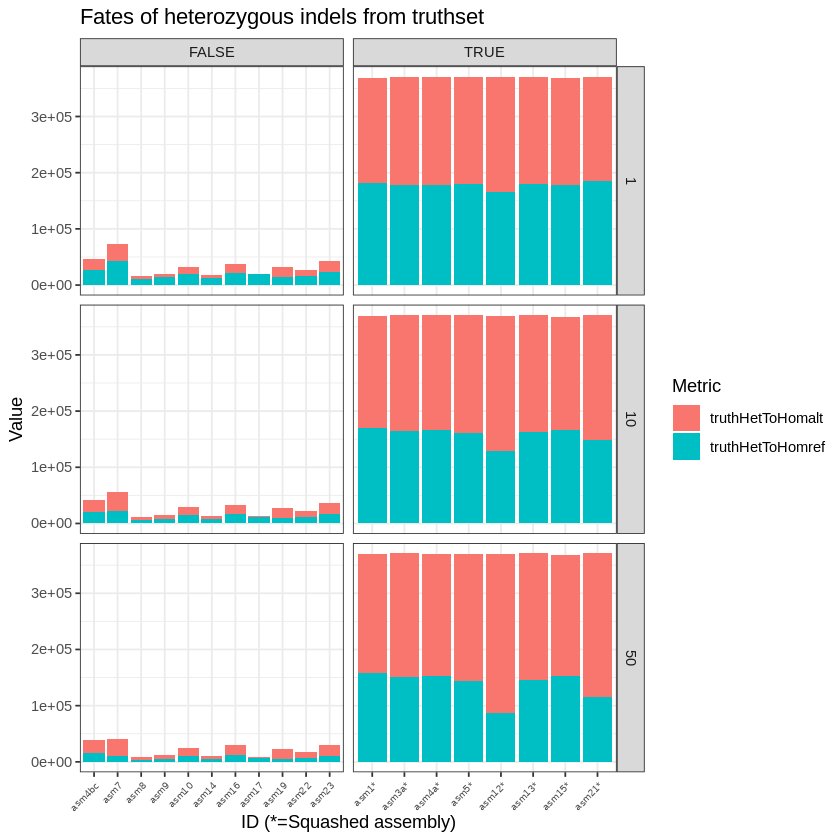

In [6]:
indels <- data.frame()
for (in_file in indels_files$file) {
    assembly <- gsub(".indels.indel.counts.horizontal.txt", "", basename(in_file))
    df <- read.table(file=in_file, header=FALSE, sep="\t", col.names=c("Metric", "Value"))
    df$Assembly <- assembly
    indels <- rbind(indels, df)
}
indels$slop <- 50
indels$slop[grepl("10 bp", indels$Metric)] <- 10
indels$slop[grepl("1 bp", indels$Metric)] <- 1
truth_name <- "GiaB_HG002"
indels$Metric <- recode(indels$Metric,
        "total GiaB_HG002 het indels"="totalTruthHet",
        "pairtopair for GiaB_HG002 indels vs our calls, 10 bp slop"="truthAllMatched",
        "pairtopair for GiaB_HG002 indels vs our calls, 50 bp slop"="truthAllMatched",
        "pairtopair for GiaB_HG002 indels vs our calls, 1 bp slop"="truthAllMatched",
        "pairtopair for GiaB_HG002 het to homalt, 50 bp slop"="truthHetToHomalt",
        "pairtopair for GiaB_HG002 het to homalt, 10 bp slop"="truthHetToHomalt",
        "pairtopair for GiaB_HG002 het to homalt, 1 bp slop"="truthHetToHomalt",
        "pairtopair for GiaB_HG002 het indels vs our calls, 50 bp slop"="truthHetMatched",
        "pairtopair for GiaB_HG002 het indels vs our calls, 10 bp slop"="truthHetMatched",
        "pairtopair for GiaB_HG002 het indels vs our calls, 1 bp slop"="truthHetMatched",
        "pairtopair for GiaB_HG002 het to het, 50 bp slop"="truthHetToHet",
        "pairtopair for GiaB_HG002 het to het, 10 bp slop"="truthHetToHet",
        "pairtopair for GiaB_HG002 het to het, 1 bp slop"="truthHetToHet")
for (assembly in unique(indels$Assembly)) {
    row <- indels[indels$Assembly==assembly & indels$Metric=="totalTruthHet",]
    row$slop <- 10
    indels <- rbind(indels, row)
    row$slop <- 1
    indels <- rbind(indels, row)
}
indels2 <- dcast(indels, Assembly+slop~Metric, value.var="Value")
indels2$truthHetToHomalt <- indels2$truthHetMatched - indels2$truthHetToHet
indels2$truthHetToHomref <- indels2$totalTruthHet - indels2$truthHetMatched
indels <- melt(indels2, id.vars=c("Assembly", "slop"), variable.name="Metric", value.name="Value")

indels <- merge(indels, assemblies, by.x="Assembly", by.y="Name")
ggplot(indels %>% filter(Metric == "truthHetToHomalt" | Metric == "truthHetToHet" | Metric == "truthHetToHomref"), aes(x=ID, y=Value, fill=Metric)) +
    geom_bar(stat="identity", position="stack") +
    facet_grid(slop~Squashed, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=5)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Fates of heterozygous indels from truthset")
ggsave(paste(output_dir, "truthHetIndelFates.png", sep="/"), width=8, height=6, units="in")

ggplot(indels %>% filter(Metric == "truthHetToHomalt" | Metric == "truthHetToHomref"), aes(x=ID, y=Value, fill=Metric)) +
    geom_bar(stat="identity", position="stack") +
    facet_grid(slop~Squashed, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("Fates of heterozygous indels from truthset")
ggsave(paste(output_dir, "truthHetIndelFatesErrorsOnly.png", sep="/"))

In [7]:
sv <- data.frame()
for (in_file in sv_files$file) {
    assembly <- gsub(".sv.counts.horizontal.txt", "", basename(in_file))
    df <- read.table(file=in_file, header=FALSE, sep="\t", col.names=c("Metric", "Value"))
    df$Assembly <- assembly
    sv <- rbind(sv, df)
}

sv$Region <- "ALL"
sv$Region[grepl("str", sv$Metric)] <- "STR"
sv$Region[grepl("segDup", sv$Metric)] <- "SEGDUP"
sv$Region[grepl("nonRep", sv$Metric)] <- "NONREP"

sv$Filter <- "ALL"
sv$Filter[grepl("PASS", sv$Metric)] <- "PASS"

sv$Metric <- gsub("str ", "", sv$Metric)
sv$Metric <- gsub("nonRep ", "", sv$Metric)
sv$Metric <- gsub("segDup ", "", sv$Metric)
sv$Metric <- gsub("str", "", sv$Metric)
sv$Metric <- gsub("nonRep", "", sv$Metric)
sv$Metric <- gsub("segDup", "", sv$Metric)

sv$Metric <- gsub("PASS ", "", sv$Metric)
sv$Metric <- gsub("PASS", "", sv$Metric)
sv$Metric <- gsub("for ", "", sv$Metric)
sv$Metric <- gsub(", 50 bp slop", "", sv$Metric)
sv$Metric <- gsub(" $", "", sv$Metric)

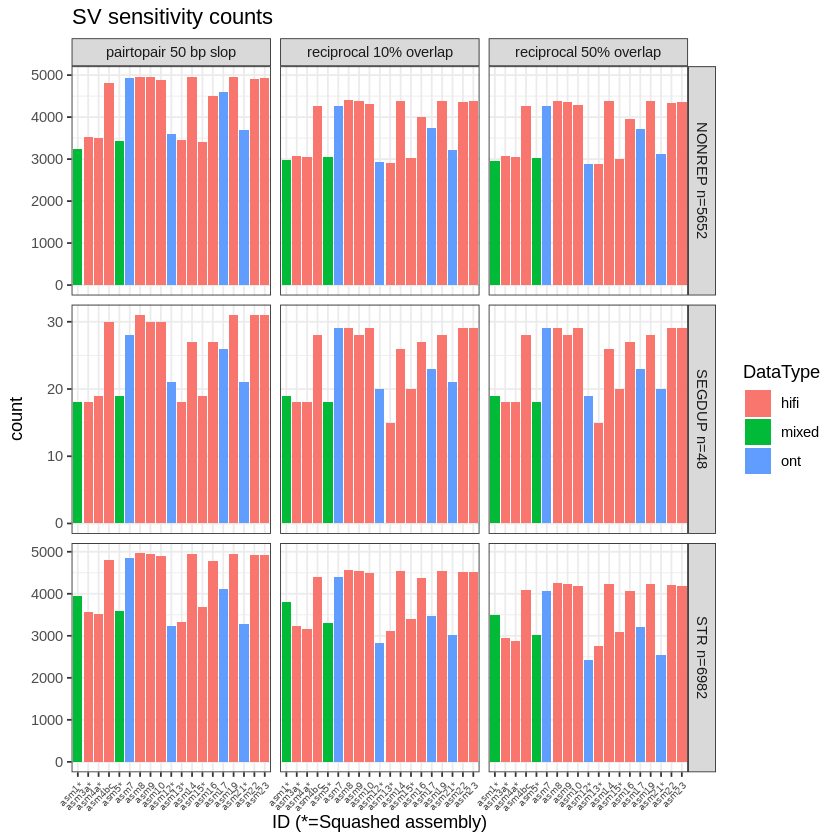

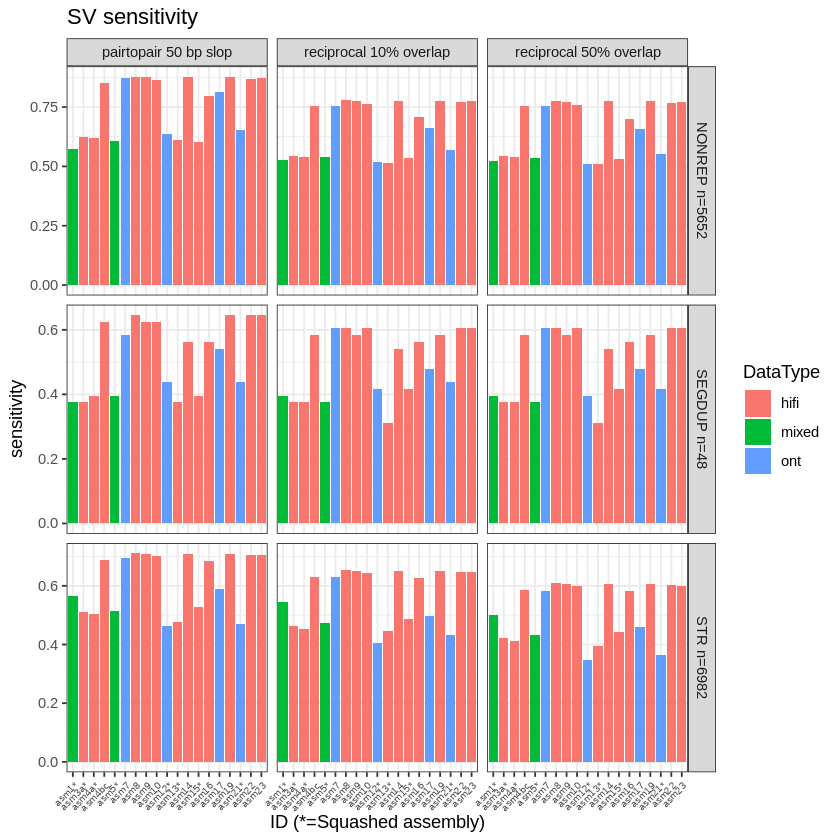

In [8]:
sv$Overlap <- "pairtopair 50 bp slop"
sv$Overlap[grepl("50", sv$Metric)] <- "reciprocal 50% overlap"
sv$Overlap[grepl("10", sv$Metric)] <- "reciprocal 10% overlap"
sv$Metric <- gsub("%", "", sv$Metric)
sv$Metric <- gsub("50 ", "", sv$Metric)
sv$Metric <- gsub("10 ", "", sv$Metric)

sv$Region <- recode(sv$Region,
                    NONREP=paste("NONREP n=", unique(sv$Value[sv$Metric=="total GiaB_HG002 calls" & sv$Region=="NONREP" & sv$Filter=="PASS"]), sep=""),
                    SEGDUP=paste("SEGDUP n=", unique(sv$Value[sv$Metric=="total GiaB_HG002 calls" & sv$Region=="SEGDUP" & sv$Filter=="PASS"]), sep=""),
                    STR=paste("STR n=", unique(sv$Value[sv$Metric=="total GiaB_HG002 calls" & sv$Region=="STR" & sv$Filter=="PASS"]), sep=""))

sv$Overlap[sv$Metric=="total GiaB_HG002 bed"] <- "reciprocal 50% overlap"
rows <- sv[sv$Metric=="total GiaB_HG002 bed",]
rows$Overlap <- "reciprocal 10% overlap"
sv <- rbind(sv, rows)

rows <- sv[sv$Metric=="SVs in confident region intersect",]
rows$Filter <- "PASS"
sv <- rbind(sv, rows)

rows <- sv[sv$Metric=="SVs in confident region both ends",]
rows$Filter <- "PASS"
sv <- rbind(sv, rows)

rows <- sv[sv$Metric=="SVs in confident region coverage gt .9",]
rows$Filter <- "PASS"
sv <- rbind(sv, rows)

sv2 <- dcast(sv, Assembly+Region+Filter+Overlap~Metric, value.var="Value")
sv2$"pairtopair GiaB_HG002 vs combined calls"[sv2$Region=="ALL" & sv2$Filter=="PASS" & sv2$Overlap=="pairtopair 50 bp slop"] <-
    sv2$"pairtopair GiaB_HG002 vs combined calls"[sv2$Region=="NONREP n=5652" & sv2$Filter=="PASS" & sv2$Overlap=="pairtopair 50 bp slop"] +
    sv2$"pairtopair GiaB_HG002 vs combined calls"[sv2$Region=="SEGDUP n=48" & sv2$Filter=="PASS" & sv2$Overlap=="pairtopair 50 bp slop"] +
    sv2$"pairtopair GiaB_HG002 vs combined calls"[sv2$Region=="STR n=6982" & sv2$Filter=="PASS" & sv2$Overlap=="pairtopair 50 bp slop"]
sv2$sensitivity <- sv2$"pairtopair GiaB_HG002 vs combined calls"/sv2$"total GiaB_HG002 calls"
sv2$sensitivity[is.na(sv2$sensitivity)] <- sv2$"Reciprocal overlap GiaB_HG002"[is.na(sv2$sensitivity)]/sv2$"total GiaB_HG002 bed"[is.na(sv2$sensitivity)]
sv2$specificity <- sv2$"pairtopair GiaB_HG002 vs combined calls"/sv2$"SVs in confident region both ends"
sv2$count <- sv2$"pairtopair GiaB_HG002 vs combined calls"
sv2$count[is.na(sv2$count)] <- sv2$"Reciprocal overlap GiaB_HG002"[is.na(sv2$count)]

sv2 <- merge(sv2, assemblies, by.x="Assembly", by.y="Name")
ggplot(sv2 %>% filter(Region != "ALL") %>% filter(Filter == "PASS"), aes(x=ID, y=count, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Region~Overlap, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("SV sensitivity counts")
ggsave(paste(output_dir, "sv.sensitivityCounts.png", sep="/"), width=10, height=10, units="in")

ggplot(sv2 %>% filter(Region != "ALL") %>% filter(Filter == "PASS"), aes(x=ID, y=sensitivity, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Region~Overlap, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("SV sensitivity")
ggsave(paste(output_dir, "sv.sensitivity.png", sep="/"), width=10, height=10, units="in")

tsv_final <- merge(tsv_final, sv2 %>% filter(Region == "ALL") %>% filter(Filter == "PASS") %>%
                   filter(Overlap == "pairtopair 50 bp slop") %>%
                   filter(Region == "ALL") %>%
                   select(ID, sensitivity, specificity) %>%
                   rename(sv_sensitivity=sensitivity) %>%
                   rename(sv_specificity=specificity), by="ID")

,ID,pairtopair GiaB_HG002 vs combined calls,DataType,specificity_method,value,specificity
,<fct>,<int>,<fct>,<fct>,<int>,<dbl>
1,asm1*,7213,mixed,both ends,17088,0.4221091
2,asm12*,6848,ont,both ends,11148,0.6142806
3,asm17,8738,ont,both ends,10206,0.8561630
4,asm10,9812,hifi,both ends,13718,0.7152646
5,asm9,9932,hifi,both ends,12044,0.8246430
6,asm22,9862,hifi,both ends,14968,0.6588723


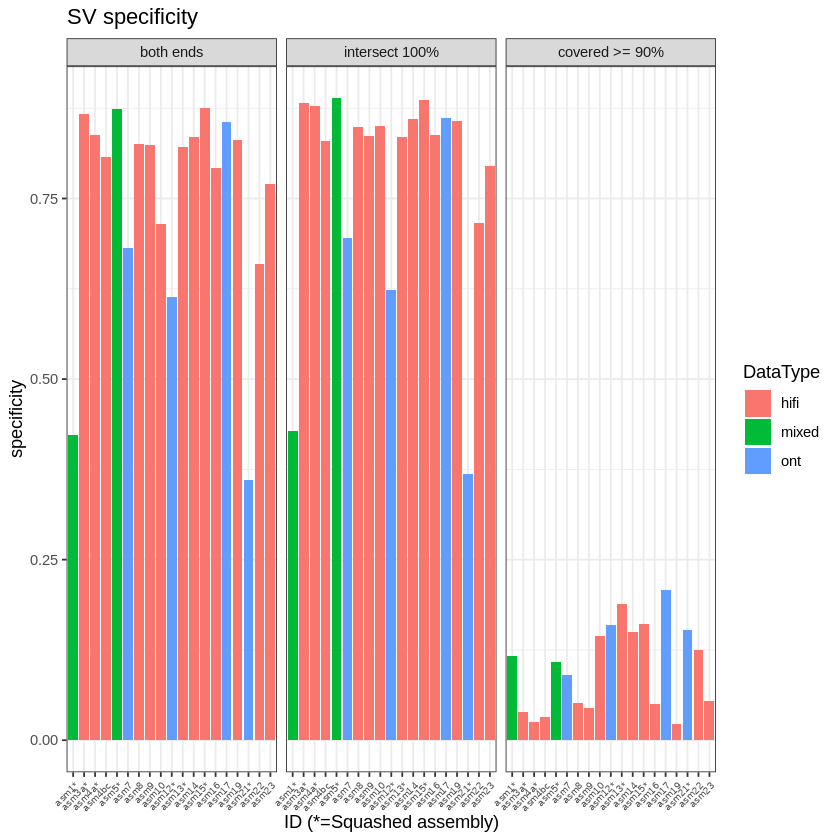

In [9]:
spec <- sv2 %>% filter(Region == "ALL" & Filter=="PASS")
spec <- spec %>% select(ID, DataType, "SVs in confident region both ends", "SVs in confident region intersect", "SVs in confident region coverage gt .9", "pairtopair GiaB_HG002 vs combined calls")
spec <- melt(spec, id.vars=c("ID", "pairtopair GiaB_HG002 vs combined calls", "DataType"))
spec$specificity <- spec$"pairtopair GiaB_HG002 vs combined calls"/spec$value
spec <- spec %>% rename(specificity_method=variable)
spec$specificity_method <- recode(spec$specificity_method, "SVs in confident region both ends"="both ends")
spec$specificity_method <- recode(spec$specificity_method, "SVs in confident region intersect"="intersect 100%")
spec$specificity_method <- recode(spec$specificity_method, "SVs in confident region coverage gt .9"="covered >= 90%")
head(spec)
ggplot(spec, aes(x=ID, y=specificity, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(.~specificity_method, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    xlab("ID (*=Squashed assembly)") +
    ggtitle("SV specificity")
ggsave(paste(output_dir, "sv.specificity.png", sep="/"), width=10, height=10, units="in")

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 

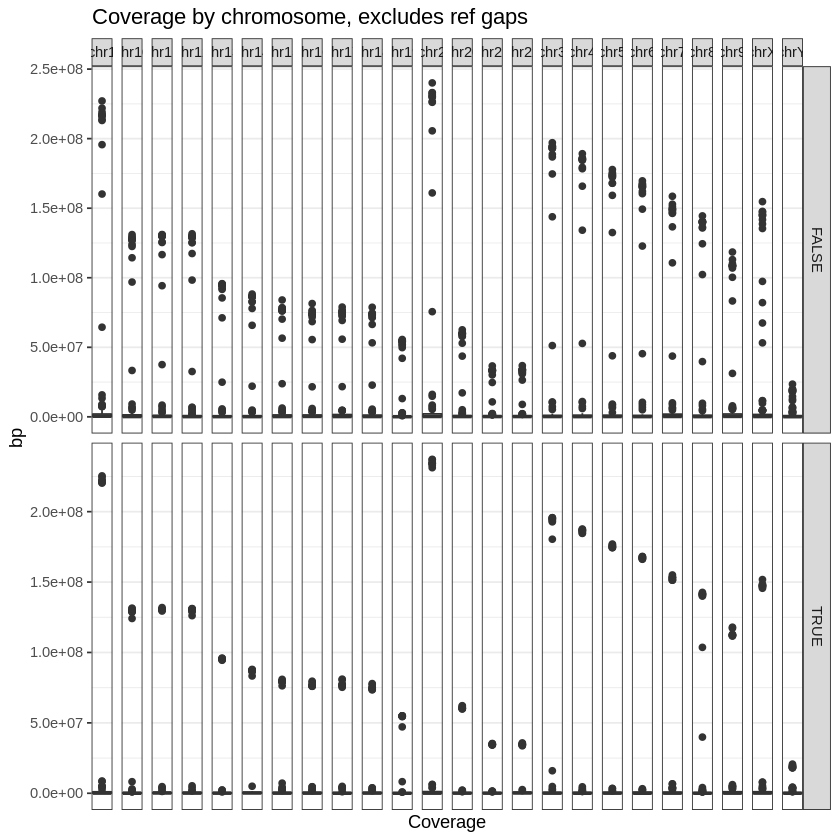

In [10]:
genome_cov <- data.frame()
cov_summary <- data.frame()
for (in_file in genome_cov_files$file) {
    assembly <- gsub(".genomecov.noGaps.hist", "", basename(in_file))
    cov <- read.table(file=in_file, header=FALSE, sep="\t", col.names=c("chrom", "cov", "bp"))
    cov <- cov %>% filter(chrom %in% c("chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chr22", "chrX", "chrY"))
    gt9 <- cov %>% filter(cov > 9)
    lt10 <- cov %>% filter(cov < 10)
    gt9_zoomed <- gt9 %>% group_by(chrom) %>% summarize(bp=sum(bp))
    gt9_zoomed$cov <- 10
    cov_zoomed <- rbind(lt10, gt9_zoomed)
    cov_zoomed$Assembly <- assembly
    genome_cov <- rbind(genome_cov, cov_zoomed)
    ggplot(cov_zoomed, aes(x=cov, y=bp)) +
        geom_bar(stat="identity", position="dodge") +
        facet_wrap("chrom", scales="free") +
        scale_x_discrete(name="Coverage") +
        theme_bw() +
        ggtitle(assembly)
    ggsave(paste(output_dir, paste(assembly, "no_gaps_coverage.png", sep="."), sep="/"))
    covDip <- cov %>% filter(!grepl("X", chrom)) %>% filter(!grepl("Y", chrom))
    gt9 <- covDip %>% filter(cov > 9)
    lt10 <- covDip %>% filter(cov < 10)
    gt9_zoomed <- gt9 %>% group_by(chrom) %>% summarize(bp=sum(bp))
    gt9_zoomed$cov <- 10
        covDip_zoomed <- rbind(lt10, gt9_zoomed)
    summary_bp <- covDip_zoomed %>% group_by(cov) %>% summarize(sum=as.numeric(sum(as.numeric(bp))))
    total_bp <- sum(summary_bp$sum)
    summary_bp$percent <- summary_bp$sum/total_bp
    summary_bp$Assembly <- assembly
    cov_summary <- rbind(cov_summary, summary_bp)

    ggplot(summary_bp, aes(x=cov, y=percent)) +
        geom_bar(stat="identity", position="dodge") +
        scale_x_discrete(name="Coverage") +
        theme_bw() +
        ggtitle(assembly)
    ggsave(paste(output_dir, paste(assembly, "no_gaps_coverage_summary.png", sep="."), sep="/"))
}
genome_cov <- merge(genome_cov, assemblies, by.x="Assembly", by.y="Name")
ggplot(genome_cov, aes(x=cov, y=bp)) +
    geom_boxplot() +
    facet_grid(Squashed~chrom, scales="free") +
    scale_x_discrete(name="Coverage") +
    theme_bw() +
    ggtitle("Coverage by chromosome, excludes ref gaps")
ggsave(paste(output_dir, "no_gaps_coverage.png", sep="/"))

Saving 6.67 x 6.67 in image



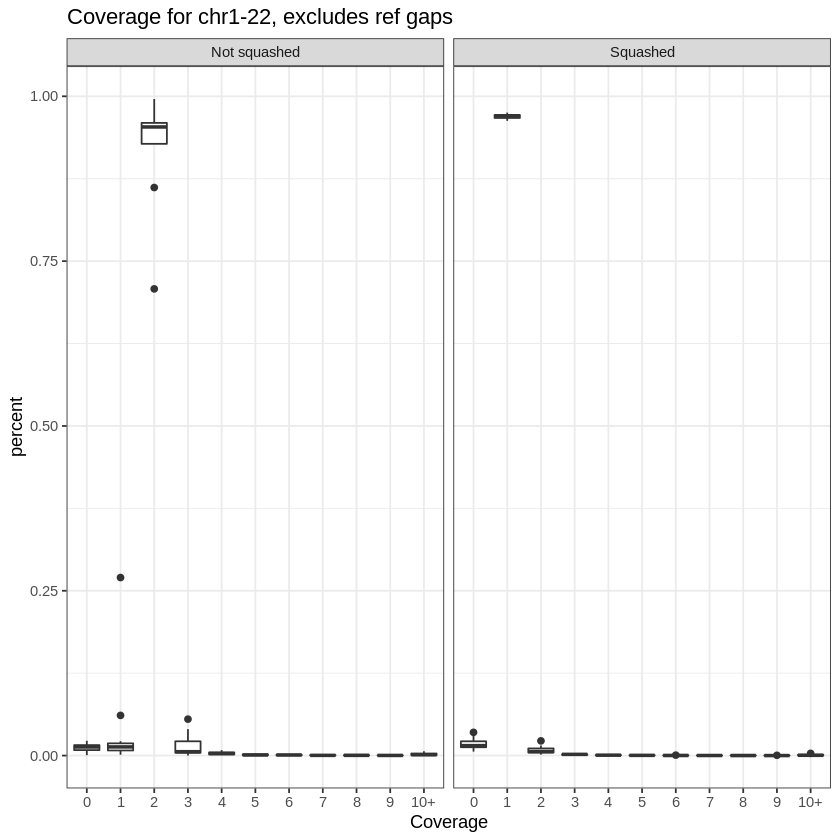

In [11]:
cov_summary <- merge(cov_summary, assemblies, by.x="Assembly", by.y="Name")
cov_summary$cov <- as.character(cov_summary$cov)
cov_summary$cov[cov_summary$cov=="10"] <- "10+"
cov_summary$cov <- factor(cov_summary$cov, levels=c("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"))
cov_summary$Squashed_text <- "Squashed"
cov_summary$Squashed_text[!cov_summary$Squashed] <- "Not squashed"
ggplot(cov_summary, aes(x=cov, y=percent)) +
    geom_boxplot() +
    facet_grid(.~Squashed_text, scales="free") +
    scale_x_discrete(name="Coverage") +
    theme_bw() +
    ggtitle("Coverage for chr1-22, excludes ref gaps")
ggsave(paste(output_dir, "no_gaps_coverage_summary.png", sep="/"))

In [12]:
for (in_file in nonRep_lengths_files$file) {
    assembly <- gsub(".ours.nonRep.lengths.txt", "", basename(in_file))
    sv_nonrep <- read.table(in_file, header=FALSE, col.names=c("type", "length"))
    sv_nonrep$region <- "nonRep"
    sv_str <- read.table(gsub("nonRep", "str", in_file), header=FALSE, col.names=c("type", "length"))
    sv_str$region <- "str"
    sv_segdup <- read.table(gsub("nonRep", "segDup", in_file), header=FALSE, col.names=c("type", "length"))
    sv_segdup$region <- "segDup"
    sv <- rbind(sv_nonrep, sv_str, sv_segdup) %>% filter(type!="GAP")
    sv$length_zoom <- sv$length
    sv$length_zoom[sv$length_zoom < -10000000] <- -1050.5
    sv$length_zoom[sv$length_zoom < -1000000] <- -1040.5
    sv$length_zoom[sv$length_zoom < -100000] <- -1030.5
    sv$length_zoom[sv$length_zoom < -10000] <- -1020.5
    sv$length_zoom[sv$length_zoom < -1000 & sv$length_zoom != -1050.5 & sv$length_zoom != -1040.5 & sv$length_zoom != -1030.5 & sv$length_zoom != -1020.5] <- -1010.5
    sv$length_zoom[sv$length_zoom > 1000 & sv$length_zoom < 10000] <- 1010.5
    sv$length_zoom[sv$length_zoom > 10000 & sv$length_zoom < 100000] <- 1020.5
    sv$length_zoom[sv$length_zoom > 100000 & sv$length_zoom < 1000000] <- 1030.5
    sv$length_zoom[sv$length_zoom > 1000000 & sv$length_zoom < 10000000] <- 1040.5
    sv$length_zoom[sv$length_zoom > 10000000] <- 1050.5
    sv$length_zoom[sv$length_zoom==-1050.5] <- -1050
    sv$length_zoom[sv$length_zoom==-1040.5] <- -1040
    sv$length_zoom[sv$length_zoom==-1030.5] <- -1030
    sv$length_zoom[sv$length_zoom==-1020.5] <- -1020
    sv$length_zoom[sv$length_zoom==-1010.5] <- -1010
    sv$length_zoom[sv$length_zoom==1010.5] <- 1010
    sv$length_zoom[sv$length_zoom==1020.5] <- 1020
    sv$length_zoom[sv$length_zoom==1030.5] <- 1030
    sv$length_zoom[sv$length_zoom==1040.5] <- 1040
    sv$length_zoom[sv$length_zoom==1050.5] <- 1050
    ggplot(sv, aes(x=length_zoom)) +
        geom_histogram(binwidth=10) +
        facet_grid(region~type, scales="free") +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size=7)) +
        ggtitle(assembly)
    ggsave(file=paste(output_dir, paste(assembly, "sv_lengths.png", sep="."), sep="/"))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



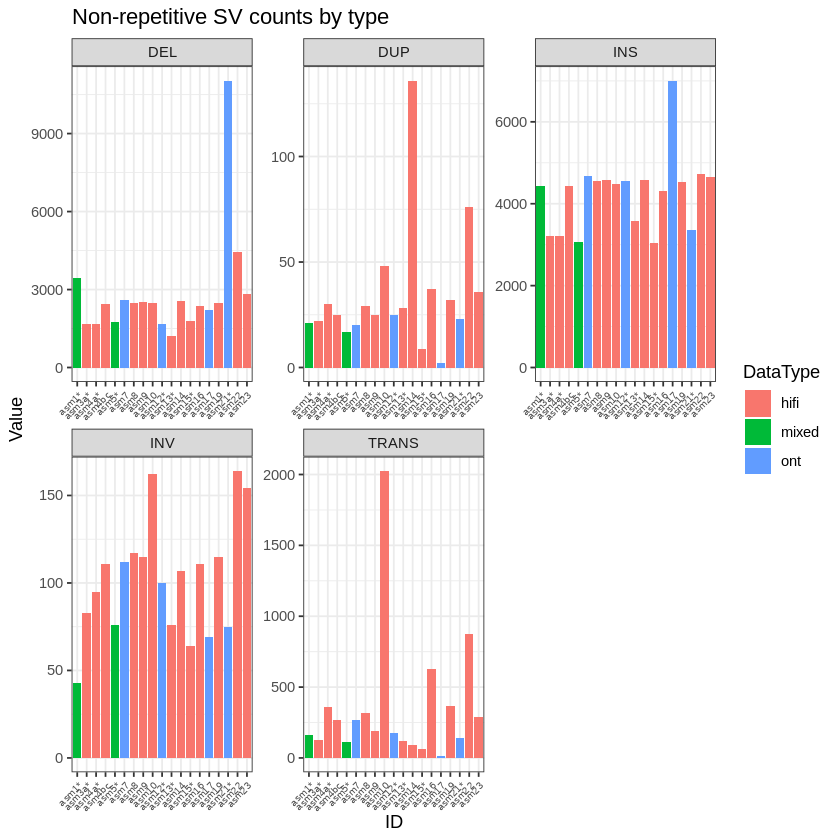

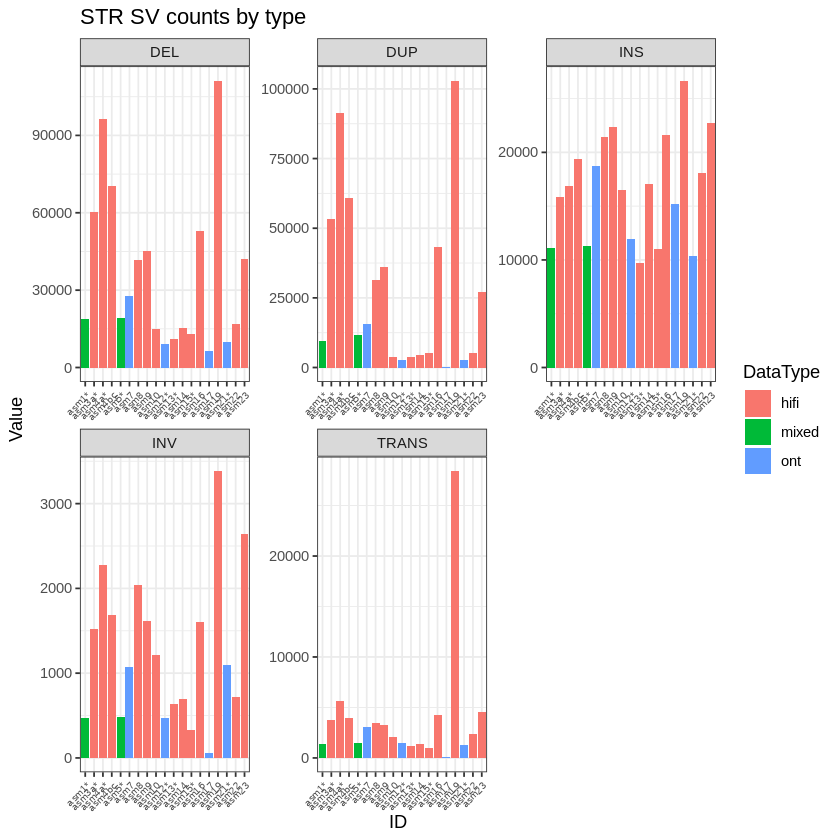

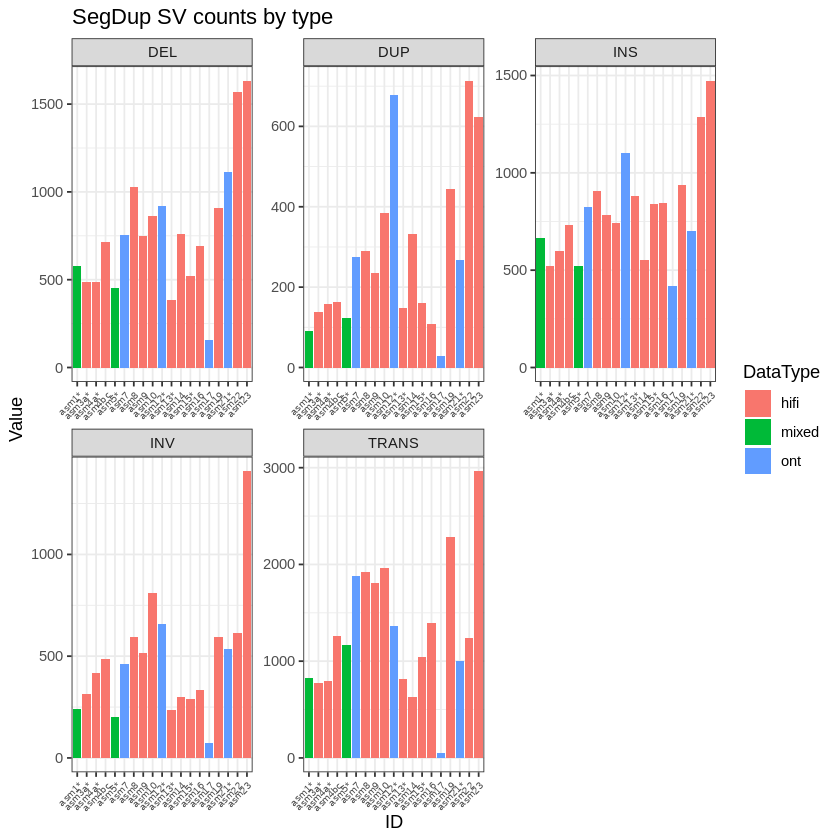

In [13]:
svCounts <- data.frame()
for (in_file in nonRep_types_files$file) {
    assembly <- gsub(".ours.nonRep.typeCount.txt", "", basename(in_file))
    for (type in c("nonRep", "str", "segDup")) {
        df <- read.table(gsub("nonRep", type, in_file), header=FALSE, sep=" ", col.names=c("Value", "Metric"))
        df$Assembly <- assembly
        df$Type <- type
        svCounts <- rbind(svCounts, df)
    }
}
svCounts$Sample <- gsub("\\..*", "", svCounts$Assembly)
svCounts <- merge(svCounts, populations, by="Sample")
svCounts <- merge(svCounts, assemblies, by.x="Assembly", by.y="Name")

ggplot(svCounts %>% filter(Type=="nonRep") %>% filter(!str_detect(Metric, "^G")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_wrap("Metric", scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    ggtitle("Non-repetitive SV counts by type")
    ggsave(paste(output_dir, "nonrepSvCountsSquashed.png", sep="/"), width=12, height=8, units="in")

ggplot(svCounts %>% filter(Type=="str") %>% filter(!str_detect(Metric, "^G")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_wrap("Metric", scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    ggtitle("STR SV counts by type")
ggsave(paste(output_dir, "strSvCountsSquashed.png", sep="/"), width=12, height=8, units="in")

ggplot(svCounts %>% filter(Type=="segDup") %>% filter(!str_detect(Metric, "^G")), aes(x=ID, y=Value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_wrap("Metric", scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=6)) +
    ggtitle("SegDup SV counts by type")
ggsave(paste(output_dir, "segDupSvCountsSquashed.png", sep="/"), width=12, height=8, units="in")

In [14]:
a <- svCounts %>% filter(!str_detect(Metric, "^G")) %>% group_by(ID, Metric) %>% summarize(count=sum(Value))
b <- dcast(a, ID~Metric)
head(a)
head(b)
tsv_final <- merge(tsv_final, b, by="ID")
head(tsv_final)

Using count as value column: use value.var to override.



ID,Metric,count
<fct>,<fct>,<int>
asm1*,DEL,22715
asm1*,DUP,9807
asm1*,INS,16181
asm1*,INV,752
asm1*,TRANS,2390
asm3a*,DEL,62377


,ID,DEL,DUP,INS,INV,TRANS
,<fct>,<int>,<int>,<int>,<int>,<int>
1,asm1*,22715,9807,16181,752,2390
2,asm3a*,62377,53585,19589,1922,4701
3,asm4a*,98503,91458,20691,2790,6760
4,asm4bc,73508,61165,24548,2279,5443
5,asm5*,21274,11943,14890,765,2712
6,asm7,31067,15847,24241,1646,5202


,ID,Name,DataType,deletions,insertions,snv_count,sv_count,sv_nonrep_count,sv_str_count,sv_segdup_count,⋯,snv_detection_specificity,indel_detection_sensitivity,indel_detection_specificity,sv_sensitivity,sv_specificity,DEL,DUP,INS,INV,TRANS
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,asm1*,HG002.Ash1v1.7,mixed,450157,325156,3691638,60184,11526,45487,3171,⋯,0.7322627,0.6376111,0.46541793,0.5687589,0.4221091,22715,9807,16181,752,2390
2,asm10,HG002.DFCI-dipasm,hifi,534633,550707,4652716,55797,9608,40714,5475,⋯,0.7439870,0.9685168,0.47238137,0.7736950,0.7152646,18410,4171,21692,2190,6079
3,asm12*,HG002.Clemson,ont,7687116,1286138,3618113,42295,7831,28783,5681,⋯,0.6786710,0.3828038,0.02536512,0.5399779,0.6142806,11605,3343,17637,1228,3046
4,asm13*,HG002.JR_wtdbg2,hifi,375437,456377,3254991,36412,5471,28000,2941,⋯,0.7439312,0.5954259,0.40706801,0.5365084,0.8216399,12492,3906,14171,950,2143
5,asm14,HG002.Marschall_Eichler,hifi,473836,532835,4648240,51764,7840,40979,2945,⋯,0.7531881,0.9813611,0.50909666,0.7823687,0.8358184,18548,4931,22225,1105,2132
6,asm15*,HG002.JHU,hifi,962996,405282,3469224,40796,5278,32229,3289,⋯,0.7128835,0.5806525,0.24166920,0.5600852,0.8754005,15351,5467,14924,685,2127


Saving 6.67 x 6.67 in image



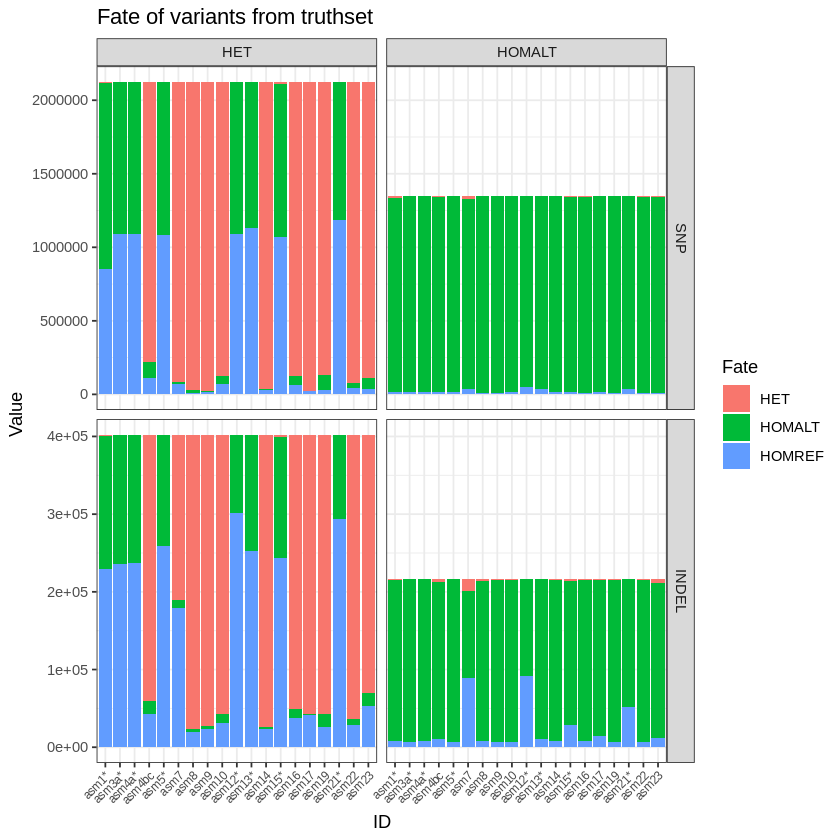

In [15]:
het <- data.frame()
for (in_file in het_fates_files$file) {
    assembly <- gsub(".happy.het.counts.horizontal.txt", "", basename(in_file))
    df <- read.table(in_file, header=FALSE, col.names=c("Type", "Origin", "Fate", "Value"))
    df$Assembly <- assembly
    het <- rbind(het, df)
}
het$Type <- factor(het$Type, levels=c("SNP", "INDEL"))
het <- merge(het, assemblies, by.x="Assembly", by.y="Name")

ggplot(het, aes(x=ID, y=Value, fill=Fate)) +
    geom_bar(stat="identity", position="stack") +
    facet_grid(Type~Origin, scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    ggtitle("Fate of variants from truthset")
ggsave(paste(output_dir, "het_fates.png", sep="/"))



In [16]:
het_totals <- het %>% group_by(ID, Origin, Type) %>% summarize(total=sum(Value))
het_totals <- dcast(het_totals, ID~Origin+Type) %>%
                rename(het_snp_total=HET_SNP) %>% rename(het_indel_total=HET_INDEL) %>%
                rename(hom_snp_total=HOMALT_SNP) %>% rename(hom_indel_total=HOMALT_INDEL)
het_tp <- het %>% filter(Fate=="HET" | Fate=="HOMALT") %>% group_by(ID, Origin, Type) %>% summarize(total=sum(Value))
het_tp <- dcast(het_tp, ID~Origin+Type) %>%
                rename(het_snp_tp=HET_SNP) %>% rename(het_indel_tp=HET_INDEL) %>%
                rename(hom_snp_tp=HOMALT_SNP) %>% rename(hom_indel_tp=HOMALT_INDEL)

head(het_totals)
head(het_tp)
tsv_final <- merge(tsv_final, het_totals, by="ID")
tsv_final <- merge(tsv_final, het_tp, by="ID")
tsv_final$het_snp_sensitivity <- tsv_final$het_snp_tp/tsv_final$het_snp_total
tsv_final$het_indel_sensitivity <- tsv_final$het_indel_tp/tsv_final$het_indel_total
tsv_final$hom_snp_sensitivity <- tsv_final$hom_snp_tp/tsv_final$hom_snp_total
tsv_final$hom_indel_sensitivity <- tsv_final$hom_indel_tp/tsv_final$hom_indel_total

Using total as value column: use value.var to override.

Using total as value column: use value.var to override.



,ID,het_snp_total,het_indel_total,hom_snp_total,hom_indel_total
,<fct>,<int>,<int>,<int>,<int>
1,asm1*,2125240,402216,1347228,216578
2,asm3a*,2125240,402216,1347228,216578
3,asm4a*,2125240,402216,1347228,216578
4,asm4bc,2125240,402216,1347228,216578
5,asm5*,2125240,402216,1347228,216578
6,asm7,2125240,402216,1347228,216578


,ID,het_snp_tp,het_indel_tp,hom_snp_tp,hom_indel_tp
,<fct>,<int>,<int>,<int>,<int>
1,asm1*,1270916,173088,1330456,208579
2,asm3a*,1034370,166735,1331393,209483
3,asm4a*,1033248,164788,1328308,209108
4,asm4bc,2011469,359531,1334044,206471
5,asm5*,1038325,142984,1330965,209692
6,asm7,2054603,222973,1309936,127024


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Saving 6.67 x 6.67 in image



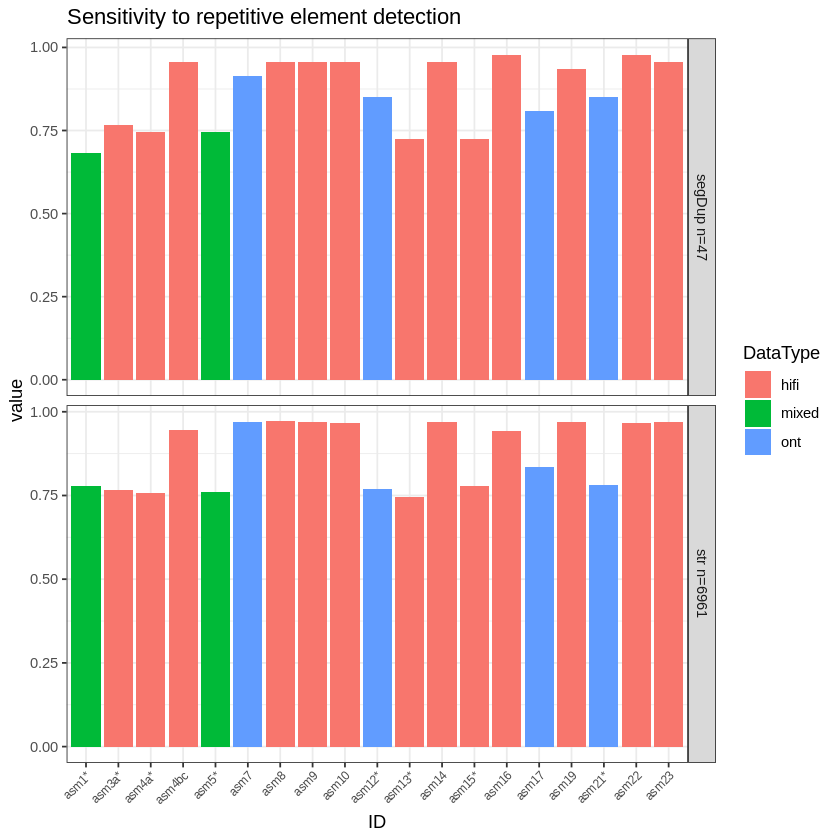

In [17]:
rep <- data.frame()
for (in_file in str_venn_files$file) {
    assembly <- gsub(".sv.str.VennInput.txt", "", basename(in_file))
    df <- read.table(in_file, header=FALSE, row.names=c("A", "B", "C", "AandB", "BandC", "AandC", "AandBandC"))
    df2 <- transpose(df)
    colnames(df2) <- rownames(df)
    df2$Assembly <- assembly
    df2$Region <- "str"
    rep <- rbind(rep, df2)
    df <- read.table(gsub("str", "segDup", in_file), header=FALSE, row.names=c("A", "B", "C", "AandB", "BandC", "AandC", "AandBandC"))
    df2 <- transpose(df)
    colnames(df2) <- rownames(df)
    df2$Assembly <- assembly
    df2$Region <- "segDup"
    rep <- rbind(rep, df2)
}
rep$totalGiaBPass <- rep$A
rep$totalGiaB <- rep$B
rep$totalOurs <- rep$C
rep$sensitivity <- rep$BandC/rep$totalGiaB
rep$sensitivityPass <- rep$AandC/rep$totalGiaBPass
rep$count <- rep$BandC
rep$countPass <- rep$AandC
rep <- merge(rep, assemblies, by.x="Assembly", by.y="Name")
rep2 <- melt(rep, id.vars=c("ID", "Region", "DataType"))
rep2$value <- as.numeric(rep2$value)
rep2$Region <- recode(rep2$Region, segDup=paste("segDup n=", unique(rep$totalGiaBPass[rep$Region=="segDup"]), sep=""),
                      str=paste("str n=", unique(rep$totalGiaBPass[rep$Region=="str"]), sep=""))
ggplot(rep2 %>% filter(variable=="sensitivityPass"), aes(x=ID, y=value, fill=DataType)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Region~., scales="free") +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1, size=7)) +
    ggtitle("Sensitivity to repetitive element detection")
ggsave(paste(output_dir, "truthset.repetitive.sensitivity.png", sep="/"))

In [18]:
summary(tsv_final)
write.table(tsv_final %>%
            select(ID, Name, snv_count, deletions, insertions, sv_count, snv_detection_sensitivity, indel_detection_sensitivity, snv_detection_specificity, indel_detection_specificity, sv_sensitivity, sv_specificity, het_snp_sensitivity, het_indel_sensitivity, hom_snp_sensitivity, hom_indel_sensitivity, DEL, INS, DUP, INV, TRANS, sv_nonrep_count, sv_str_count, sv_segdup_count) %>%
            arrange(ID),
            file=paste(output_dir, "stats.tsv", sep="/"), row.names=FALSE, quote=FALSE, sep="\t")

       ID                          Name     DataType    deletions      
 asm1*  : 1   HG002.Ash1v1.7         : 1   hifi :13   Min.   : 346731  
 asm3a* : 1   HG002.Clemson          : 1   mixed: 2   1st Qu.: 480094  
 asm4a* : 1   HG002.crossstitch      : 1   ont  : 4   Median : 554638  
 asm4bc : 1   HG002.DFCI-dipasm      : 1              Mean   :1425833  
 asm5*  : 1   HG002.DFCI-hifiasm     : 1              3rd Qu.: 945396  
 asm7   : 1   HG002.Dovetail_Genomics: 1              Max.   :8692148  
 (Other):13   (Other)                :13                               
   insertions        snv_count          sv_count      sv_nonrep_count
 Min.   : 325156   Min.   :3216193   Min.   : 32611   Min.   : 5278  
 1st Qu.: 441275   1st Qu.:3654876   1st Qu.: 49626   1st Qu.: 6745  
 Median : 550707   Median :4648240   Median : 63274   Median : 7890  
 Mean   : 588476   Mean   :4554668   Mean   : 99984   Mean   : 8284  
 3rd Qu.: 658198   3rd Qu.:5205604   3rd Qu.:131567   3rd Qu.: 9566  
 Max